# Trực quan hóa dữ liệu

#### Các thư viện cần import

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Đọc 2 tập dữ liệu: Raw và Đã chuẩn hóa

In [11]:
df_raw = pd.read_csv("RawData.csv")
df_raw

,Date,AQI-IN,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Humidity
0,2021-04-08,60,31,46,7,14,1,31.0,9,44
1,2021-04-09,147,70,79,6,19,1,39.0,10,39
2,2021-04-10,107,57,72,4,16,1,42.0,13,42
3,2021-04-11,74,31,62,3,9,1,45.0,14,47
4,2021-04-12,42,17,26,2,8,1,41.0,11,69
...,...,...,...,...,...,...,...,...,...,...
1033,2024-04-03,62,16,57,2,7,372,NaN,11,18
1034,2024-04-04,54,24,57,2,6,283,NaN,9,25
1035,2024-04-05,87,47,74,4,17,508,NaN,10,35
1036,2024-04-06,175,83,91,2,12,533,NaN,14,46


In [12]:
df_trans = pd.read_csv("CleanData.csv")
df_trans

,Date,AQI-IN,PM2.5,PM10,SO2,NO2,O3,CO,Temp,Humidity
0,2021-04-08,4.787561,4.127394,4.521907,2.644121,3.333478,4.127394,25.592968,-0.371885,6.633250
1,2021-04-09,5.683591,4.941693,5.062635,2.491780,3.638278,4.356873,18.248288,-0.283948,6.244998
2,2021-04-10,5.365998,4.736275,4.969862,2.094713,3.466711,4.430958,32.015621,-0.020139,6.480741
3,2021-04-11,4.997258,4.127394,4.820347,1.818446,2.893444,4.499933,28.722813,0.067798,6.855655
4,2021-04-12,4.430958,3.527224,3.951613,1.443635,2.776472,4.406868,17.549929,-0.196012,8.306624
...,...,...,...,...,...,...,...,...,...,...
1091,2024-04-03,4.820347,3.466711,4.736275,1.443635,2.644121,4.094622,19.287302,-0.196012,4.242641
1092,2024-04-04,4.682217,3.871635,4.736275,1.443635,2.491780,4.564457,16.822604,-0.371885,5.000000
1093,2024-04-05,5.159088,4.543408,4.997258,2.094713,3.527224,4.700563,22.538855,-0.283948,5.916080
1094,2024-04-06,5.857941,5.112024,5.204037,1.443635,3.179785,3.738236,23.086793,0.067798,6.782330


## Mối quan hệ của Biến Mục Tiêu với Các biến đầu vào

Sử dụng PairPlot để thể hiện mối quan giữa AQI so với các biến đầu vào.

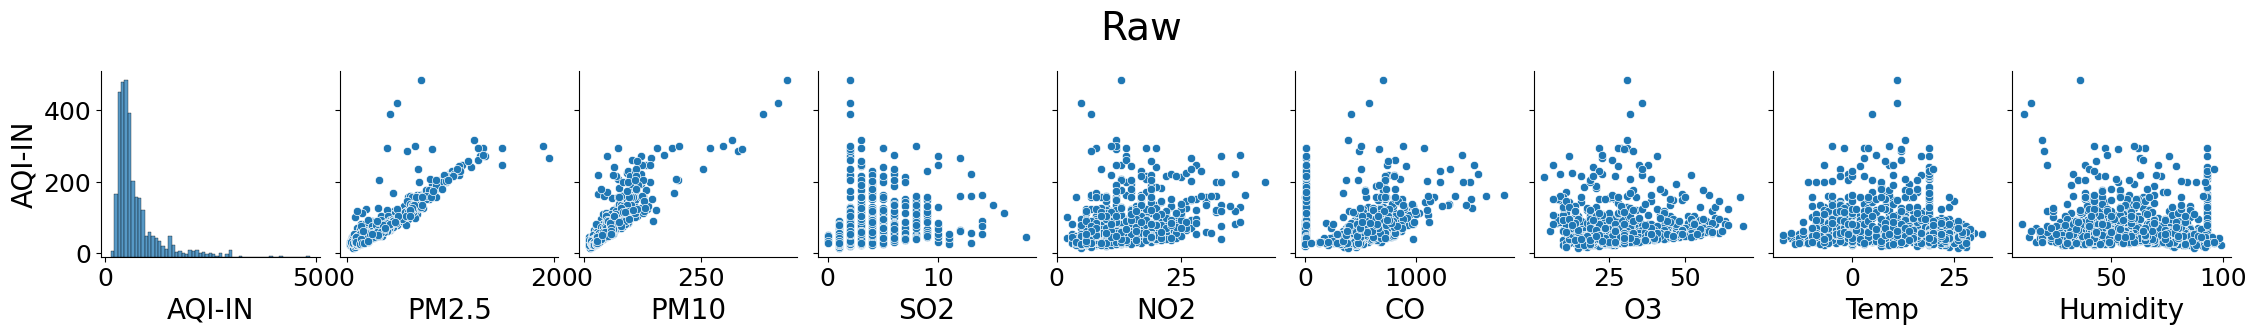

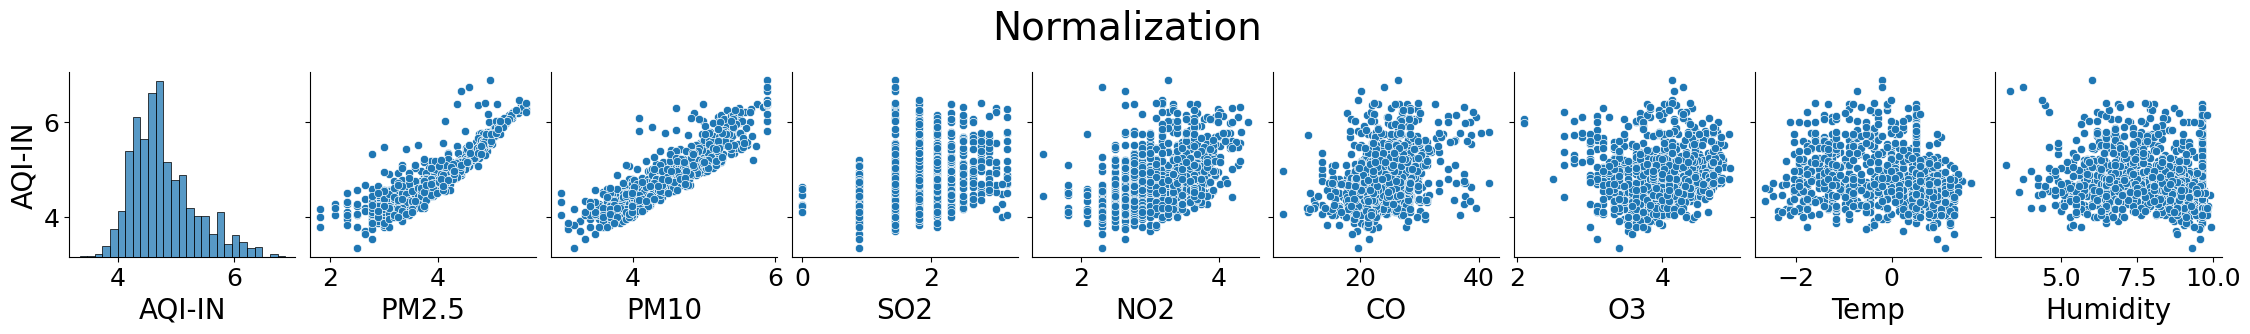

In [13]:
pairplt_raw = sns.pairplot(df_raw, x_vars=['AQI-IN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Humidity'], y_vars=['AQI-IN'])
pairplt_raw.fig.suptitle('Raw', y=1.2, fontsize=28)

pairplt_trans = sns.pairplot(df_trans, x_vars=['AQI-IN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Humidity'], y_vars=['AQI-IN'])
pairplt_trans.fig.suptitle('Normalization', y=1.2, fontsize=28)

# Tăng kích thước font chữ cho các chú thích
for ax in pairplt_raw.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18) 

# Tăng kích thước font chữ cho các chú thích
for ax in pairplt_trans.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18) 

#### Nhận xét
Trong 2 đồ thị (AQI-IN vs PM2.5) và (AQI-IN vs PM10), các điểm có xu hướng phân bố thành đường thẳng đi lên (tương quan thuận).
#### Kết luận
Có thể nói rằng, Biến Mục Tiêu AQI-IN chịu ảnh hưởng bởi biến PM2.5 và PM10 nhiều nhất.
Chỉ số PM2.5 và PM10 càng tăng thì Chỉ số AQI-IN càng lớn và ngược lại.

## Mối quan hệ giữa Các biến đầu vào

### Sử dụng HeatMap để biểu diễn mối tương quan của các cặp biến đầu vào

Các cặp biến có chỉ số Corr càng lớn thì càng tương quan với nhau

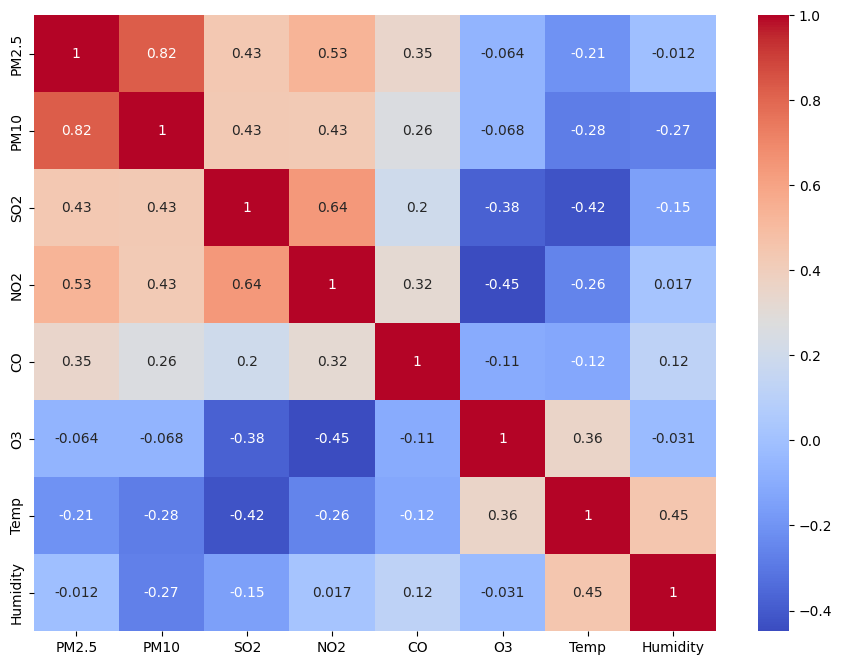

In [14]:
cols_to_include = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Humidity']
plt.figure(figsize=(11, 8))
sns.heatmap(df_trans[cols_to_include].corr(), annot=True, cmap='coolwarm')

# Hiển thị biểu đồ
plt.show()

### Sử dụng ScatterPlot để biểu diễn mối quan hệ của 2 biến PM2.5 và PM10

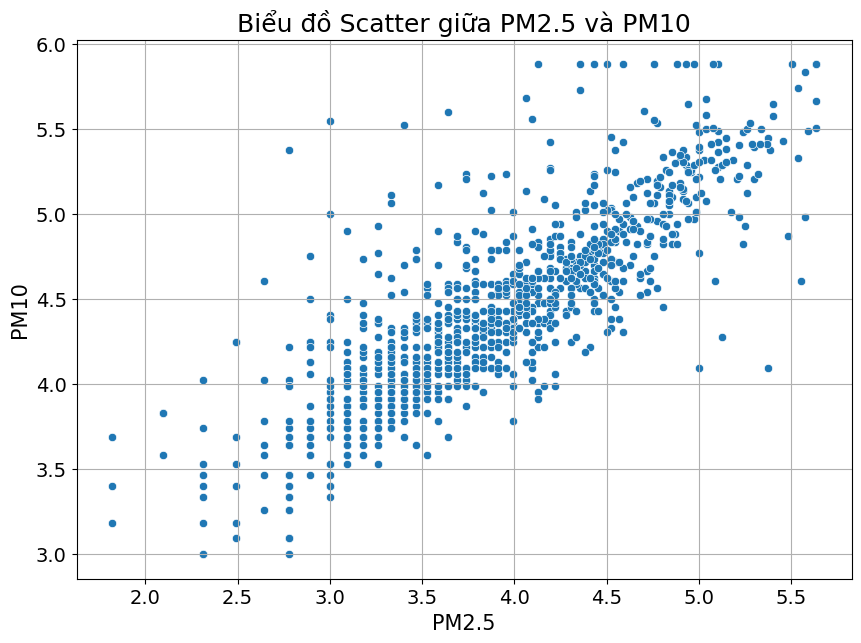

In [15]:
# Vẽ scatter plot bằng Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PM2.5', y='PM10', data=df_trans)
plt.title('Biểu đồ Scatter giữa PM2.5 và PM10', fontsize=18)
plt.xlabel('PM2.5', fontsize=15)
plt.ylabel('PM10', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### Nhận xét
Dựa vào 2 đồ thị trên, ta thấy các biến đầu vào hầu như độc lập, không phụ thuộc vào nhau. Duy chỉ có biến PM2.5 và PM10 có mối tương quan với nhau rõ rệt nhất (>0.8) theo Heatmap. Đồng thời, qua ScatterPlot, các điểm có xu hướng phân bố thành đường thẳng đi lên (tương quan thuận).
### Kết luận
Có thể nói rằng, giá trị PM2.5 càng tăng thì giá trị PM10 càng lớn và ngược lại.

## Time Series

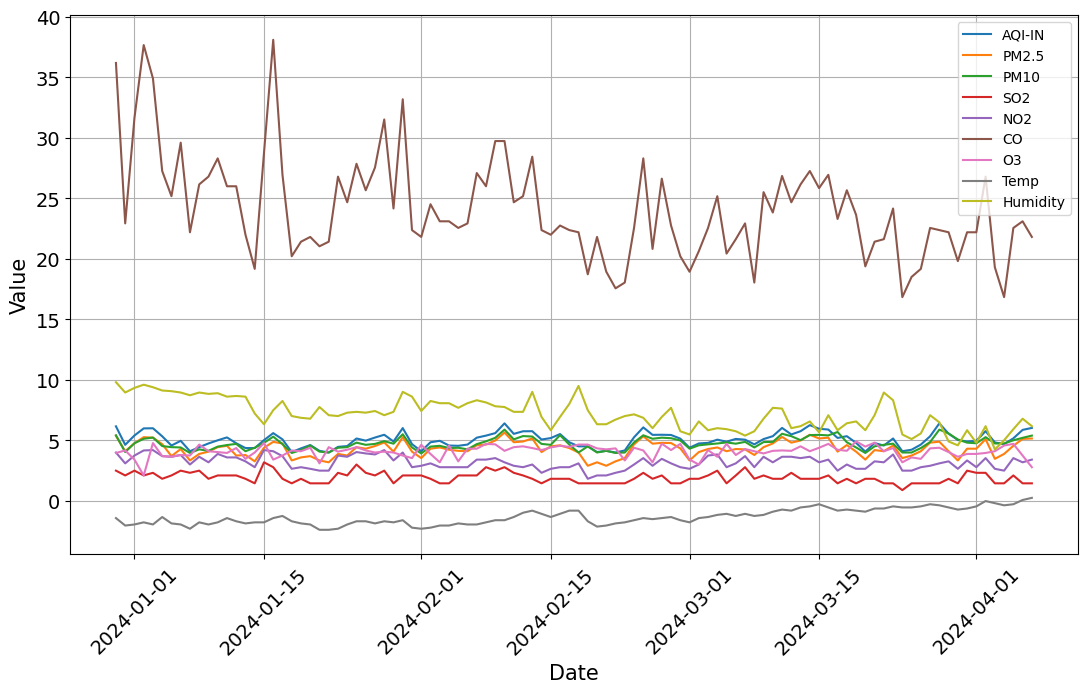

In [16]:
# Tắt cảnh báo "SettingWithCopyWarning"
pd.options.mode.chained_assignment = None

df_trans = pd.read_csv("CleanData.csv")

cols_to_include = ['AQI-IN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Humidity']

# Chuyển cột ngày thành định dạng datetime nếu cần
df_trans_timesr =df_trans.tail(100)
df_trans_timesr['Date'] = pd.to_datetime(df_trans_timesr['Date'])

# Đặt cột ngày làm index của DataFrame
df_trans_timesr.set_index('Date', inplace=True)

# Vẽ đồ thị time series cho các cột
plt.figure(figsize=(13, 7))
for column in cols_to_include:#df_trans_timesr.columns:
    plt.plot(df_trans_timesr.index, df_trans_timesr[column], label=column)

# plt.title('Time Series Data')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



### Nhận xét
Trong đồ thị dưới, dễ thấy 3 đường biểu diễn AQI-IN, PM2.5 và PM10 khá tương đồng nhau. Từ đó càng khẳng định Biến Mục Tiêu AQI chịu ảnh hưởng lớn từ PM2.5 và PM10

Bên cạnh đó, đường thẳng biểu diễn Humidity (độ ẩm), Temp (nhiệt độ) và O3 có hình dáng sai lệch nhiều so với đường thẳng biểu diễn AQI-IN. Từ đó, ta thấy 3 yếu tố ít ảnh hưởng đến chỉ số AQI-IN nhất là Humidity, Temp và O3

# So sánh các chỉ số ở quá khứ và hiện tại

### 1) Chỉ số AQI-IN ở Tháng 3 năm 2023 và năm 2024

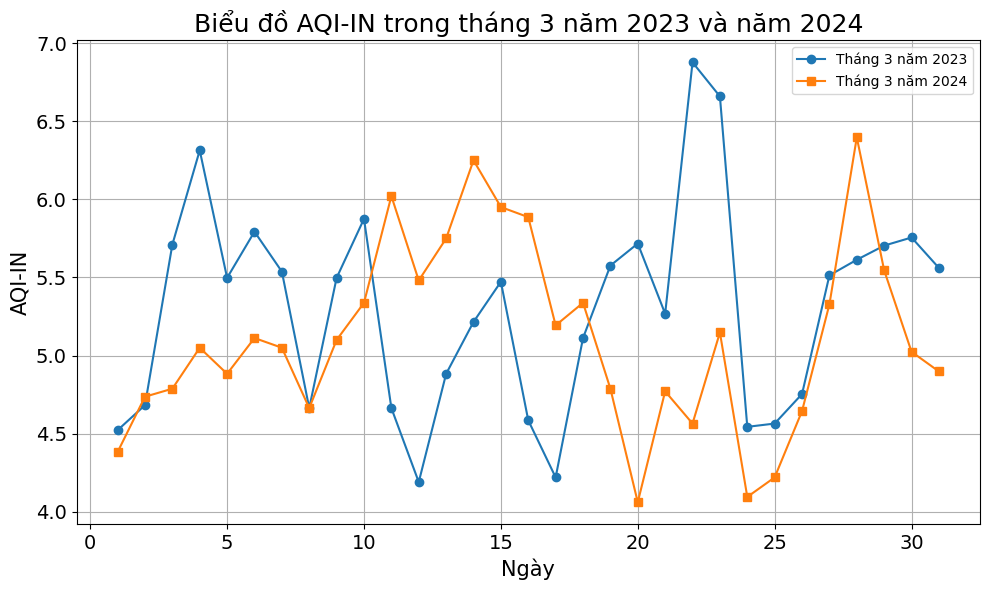

In [17]:
df_trans = pd.read_csv("CleanData.csv")
# Đọc dữ liệu từ DataFrame
df_trans['Date'] = pd.to_datetime(df_trans['Date'])
df_trans.set_index('Date', inplace=True)

# Lọc dữ liệu theo tháng 4 năm 2023
df_april_2023 = df_trans.loc['2023-03']
df_april_2024 = df_trans.loc['2024-03']

# Tạo dãy số từ 1 đến 30
days = range(1, 32)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(days, df_april_2023['AQI-IN'], marker='o', linestyle='-', label='Tháng 3 năm 2023')
plt.plot(days, df_april_2024['AQI-IN'], marker='s', linestyle='-', label='Tháng 3 năm 2024')
plt.title('Biểu đồ AQI-IN trong tháng 3 năm 2023 và năm 2024', fontsize=18)
plt.xlabel('Ngày', fontsize=15)
plt.ylabel('AQI-IN', fontsize=15)
plt.xticks(fontsize=14)  # Quay các giá trị trục Ox 45 độ
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Nhận xét
Chỉ số AQI-IN có xu hướng biến động khá tương đồng giữa cùng 1 tháng trong 2 năm gần nhất. Tuy nhiên, biên độ biến động lại khá lớn.

### 2) Biến dự đoán PM2.5 và PM10

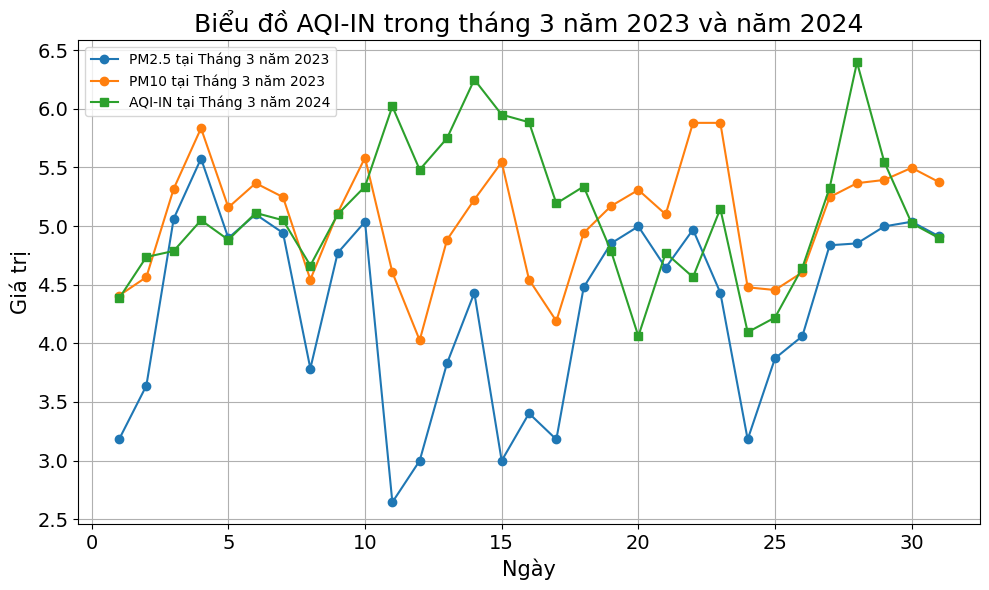

In [18]:
df_trans = pd.read_csv("CleanData.csv")
# Đọc dữ liệu từ DataFrame
df_trans['Date'] = pd.to_datetime(df_trans['Date'])
df_trans.set_index('Date', inplace=True)

# Lọc dữ liệu theo tháng 4 năm 2023
df_april_2023 = df_trans.loc['2023-03']
df_april_2024 = df_trans.loc['2024-03']

days = range(1, 32)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(days, df_april_2023['PM2.5'], marker='o', linestyle='-', label='PM2.5 tại Tháng 3 năm 2023')
plt.plot(days, df_april_2023['PM10'], marker='o', linestyle='-', label='PM10 tại Tháng 3 năm 2023')
plt.plot(days, df_april_2024['AQI-IN'], marker='s', linestyle='-', label='AQI-IN tại Tháng 3 năm 2024')
plt.title('Biểu đồ AQI-IN trong tháng 3 năm 2023 và năm 2024', fontsize=18)
plt.xlabel('Ngày', fontsize=15)
plt.ylabel('Giá trị', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Nhận xét
Xu hướng biến động của chỉ số PM2.5 và PM10 trong quá khứ (T3/2023) khá tương đồng với Xu hướng biến động của chỉ số AQI-IN ở hiện tại (T3/2024)

# Kết luận chung

## 1. Mối quan hệ giữa AQI-IN và Các biến đầu vào
* Chỉ số AQI-IN chịu ảnh hưởng lớn nhất từ 2 chỉ số: PM2.5 và PM10 (tương quan thuận)
* Chỉ số AQI-IN ít chịu ảnh hưởng từ 3 chỉ số: Humidity, Temp và O3

## 2. Mối quan hệ tìm ẩn giữa Các biến đầu vào
* Chỉ số PM2.5 và PM10 có mối tương quan thuận với nhau. Nghĩa là, sự tăng giảm của PM2.5 thường đi kèm với sự biến động của PM10, và ngược lại.

## 3. Biến dự đoán
* Biến PM2.5 và PM10 có khả năng dự đoán được Biến mục tiêu AQI-IN